<a href="https://colab.research.google.com/github/HarshJain41/employee_promotion_prediction/blob/main/Employee_Promotion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>**Predict whether the Employee of an Organization should get Promotion or Not?**</center>

&nbsp;

Our client is a large MNC and they have 9 broad verticals across the organisation. One of the problem our client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:
    * They first identify a set of employees based on recommendations/ past performance.
    * Selected employees go through the separate training and evaluation program for each vertical. These programs are based on he required skill of each vertical
    * At the end of the program, based on various factors such as training performance, an employee gets the promotion

![image](https://corehr.files.wordpress.com/2013/02/wrong-promotion1.jpg?w=290)

In [2]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

In [3]:
# reading the datasets

train = pd.read_csv('/content/drive/MyDrive/Machine Learning/Employee_Promotion_Prediction/train (1).csv')
test = pd.read_csv('/content/drive/MyDrive/Machine Learning/Employee_Promotion_Prediction/test (1).csv')

In [4]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [9]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


We have observations of 54,808 employees that we want to analyse. And there are 14 features in our dataset on the top of which we are going to build our model to predict if the employee should be promoted or not.

In [6]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [8]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train.shape)
print("Shape of the Test Data :", test.shape)

Shape of the Training Data : (54808, 14)
Shape of the Test Data : (23490, 13)


## Descriptive Statistics

* Descriptive Statistics is one of the most Important Step to Understand the Data and take out Insights
* First we will the Descriptive Statistics for the Numerical Columns
* for Numerical Columns we check for stats such as Max, Min, Mean, count, standard deviation, 25 percentile, 50 percentile, and 75 percentile.
* Then we will check for the Descriptive Statistics for Categorical Columns
* for Categorical Columns we check for stats such as count, frequency, top, and unique elements.

In [12]:
# lets check descriptive statistics for numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [13]:
# lets check descriptive statistics for categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


In [14]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [15]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

<Axes: >

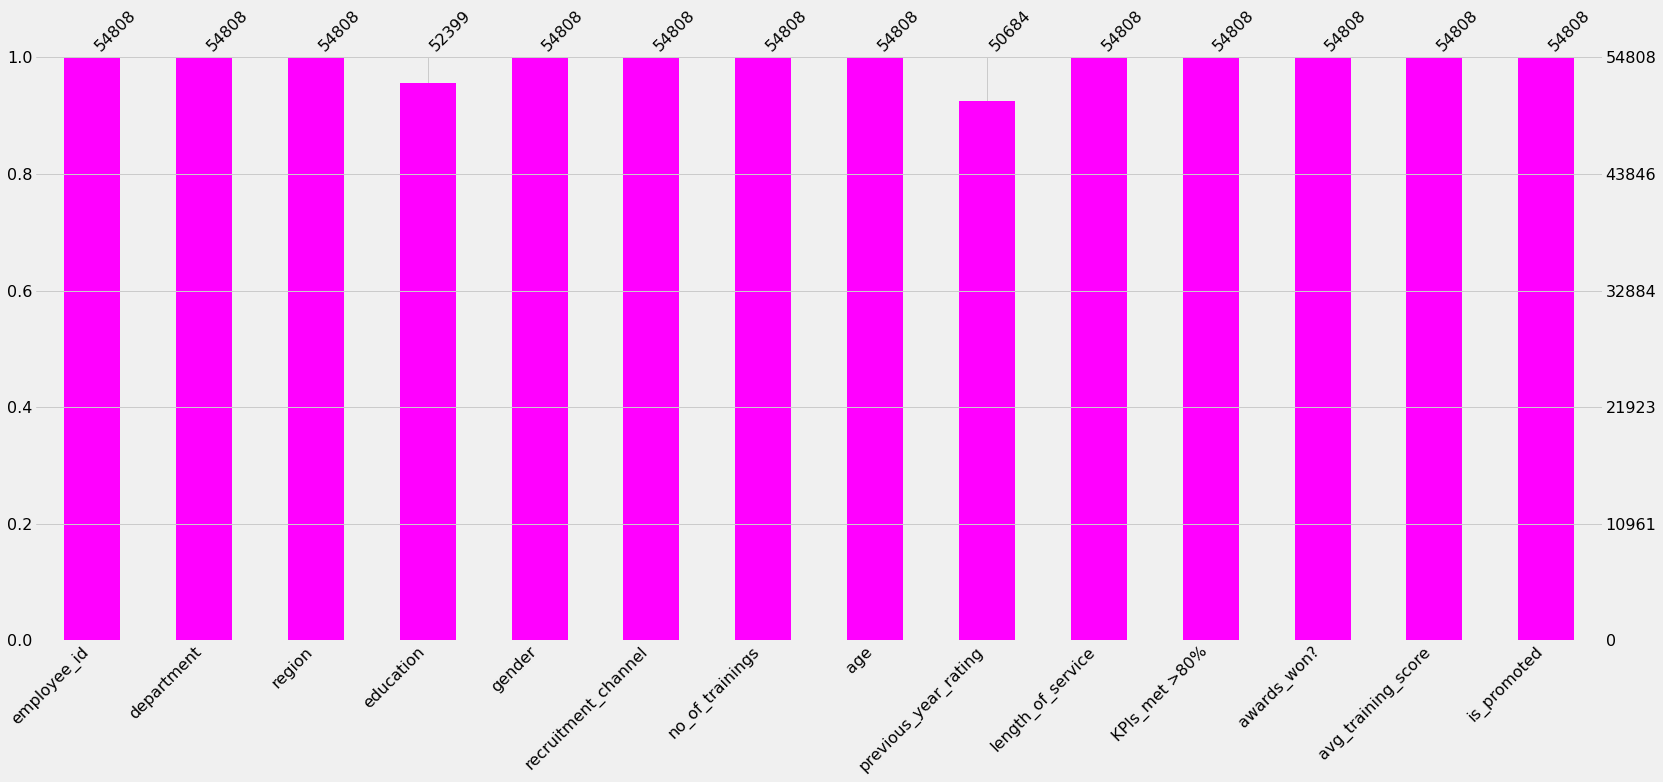

In [17]:
import missingno as msno
msno.bar(train, color='magenta')

<Axes: >

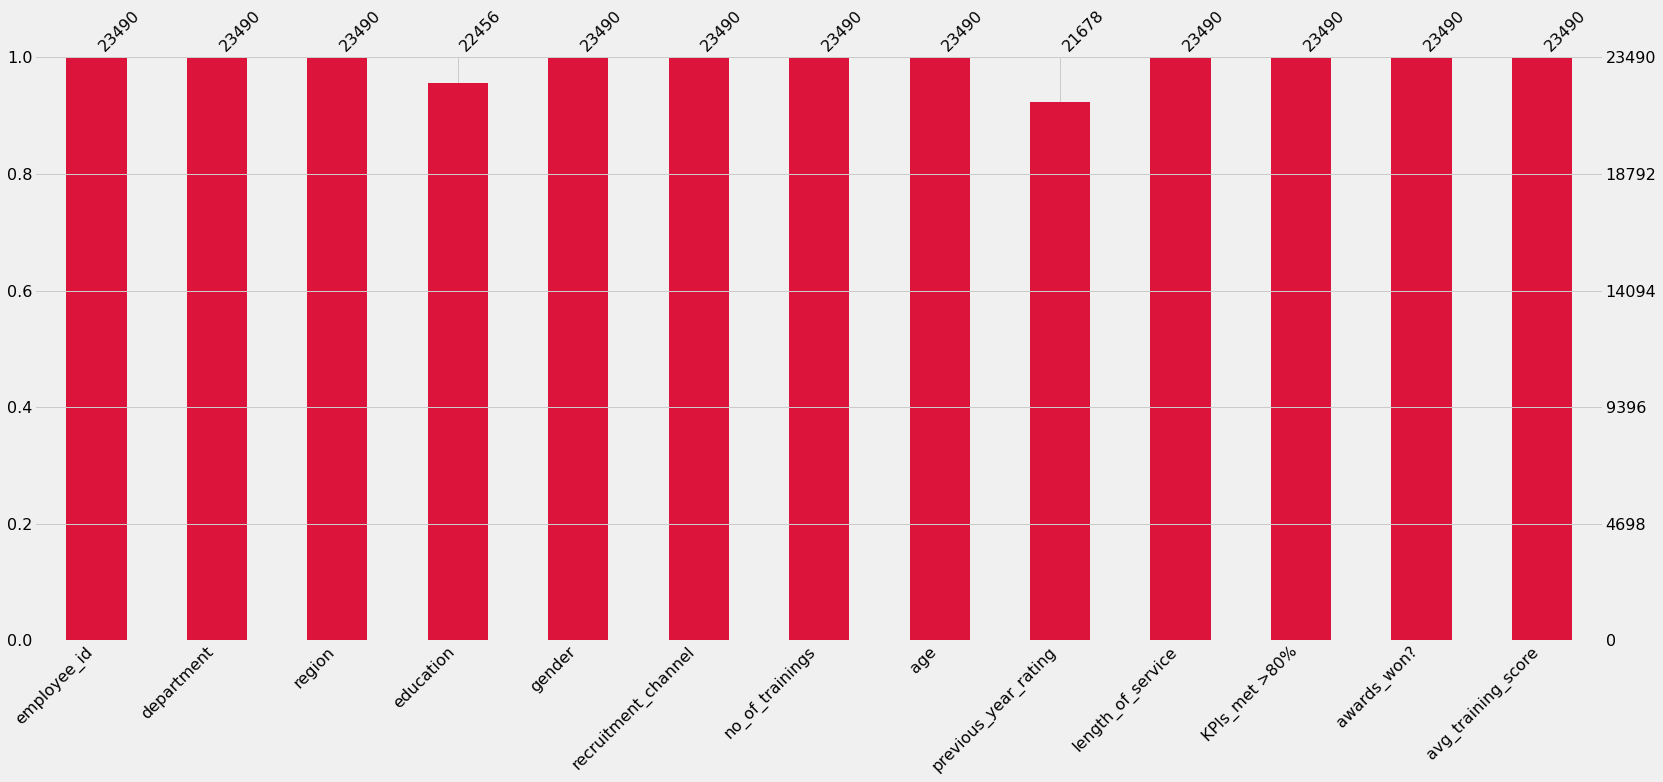

In [18]:
import missingno as msno
msno.bar(test, color='crimson')

## Treatment of Missing Values

* Treatment of Missing Values is very Important Step in any Machine Learning Model Creation 
* Missing Values can be cause due to varios reasons such as the filling incomplete forms, values not available, etc
* There are so many types of Missing Values such as 
     * Missing values at Random
     * Missing values at not Random
     * Missing Values at Completely Random
* What can we do to Impute or Treat Missing values to make a Good Machine Learning Model
    * We can use Business Logic to Impute the Missing Values
    * We can use Statistical Methods such as Mean, Median, and Mode.
    * We can use ML Techniques to impute the Missing values
    * We can delete the Missing values, when the Missing values percentage is very High.
    
* When to use Mean, and when to use Median?
    * We use Mean, when we do not have Outliers in the dataset for the Numerical Variables.
    * We use Median, when we have outliers in the dataset for the Numerical Variables.
    * We use Mode, When we have Categorical Variables.

## Analysing Target Column

In [20]:
target = train['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

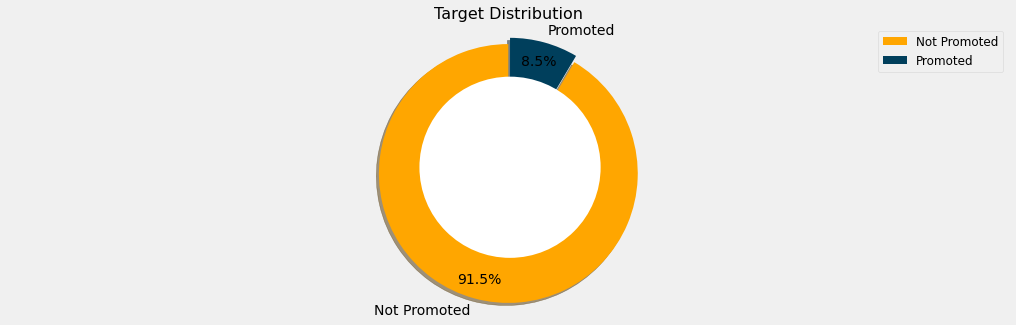

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the labels and sizes for the pie chart
labels = ['Not Promoted', 'Promoted']
sizes = [50140, 4668]

# Define the colors for each category
colors = ['#ffa600', '#003f5c']

# Create the pie chart with a shadow and explosion effect
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, shadow=True, explode=(0.05, 0))

# Add a circle in the middle to create a donut chart effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title to the chart
ax1.set_title("Target Distribution", fontsize=16)

# Set the font size for the labels
plt.rcParams['font.size'] = 14

# Remove the unnecessary border lines
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Add a legend and adjust its position
plt.legend(labels, loc="best", fontsize=12)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

# Display the chart
plt.show()
